In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [5]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Lucky Number,2015,USA,2015-09-01


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

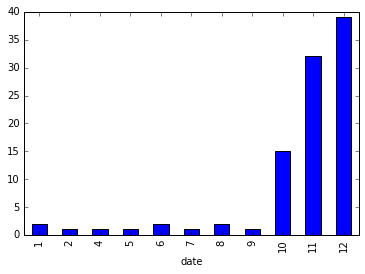

In [6]:
r = release_dates
r = r[r.title.str.contains('Christmas') & (r.country == 'USA')]
r.groupby(r.date.dt.month).size().plot(kind = 'bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

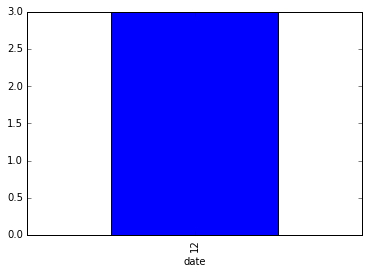

In [7]:
r = release_dates
r = r[r.title.str.startswith('The Hobbit') & (r.country == 'USA')]
r.groupby(r.date.dt.month).size().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

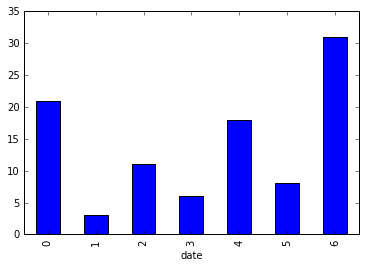

In [8]:
r = release_dates
r = r[r.title.str.contains('Romance') & (r.country == 'USA')]
r.groupby(r.date.dt.dayofweek).size().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

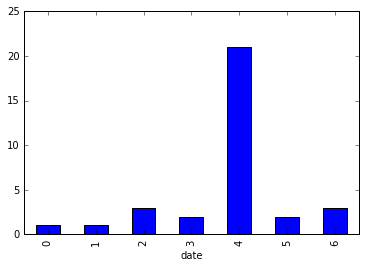

In [9]:
r = release_dates
r = r[r.title.str.contains('Action') & (r.country == 'USA')]
r.groupby(r.date.dt.dayofweek).size().plot(kind = 'bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [20]:
c = cast[(cast.name == 'Judi Dench') & (cast.year // 10*10 == 1990)]
c = c.merge(release_dates[release_dates.country == 'USA']).sort_values(by = 'date')
c


,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6,USA,1999-11-19


### Here groupby is not the nicest solution. The solution above is much better!!!

In [15]:
c = cast[(cast.name == 'Judi Dench') & (cast.year // 10*10 == 1990)]
c = c.merge(release_dates[release_dates.country == 'USA'])
g = c.groupby(['title', 'year']).date.max().sort_values()
g

title                    year
GoldenEye                1995   1995-11-17
Jack & Sarah             1995   1996-03-22
Hamlet                   1996   1996-12-25
Mrs Brown                1997   1997-10-03
Tomorrow Never Dies      1997   1997-12-19
Shakespeare in Love      1998   1999-01-08
Tea with Mussolini       1999   1999-05-14
The World Is Not Enough  1999   1999-11-19
Name: date, dtype: datetime64[ns]

### This is solution according to the teacher

In [17]:
usa = release_dates[release_dates.country == 'USA']

c = cast
c = c[c.name == 'Judi Dench']
c = c[c.year // 10 * 10 == 1990]
c.merge(usa).sort_values(by = 'date')

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

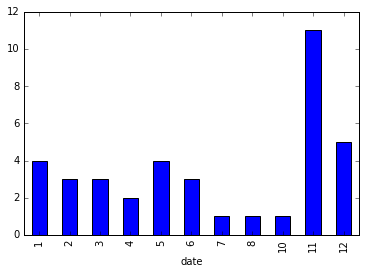

In [34]:
c = cast[cast.name == 'Judi Dench']
c = c.merge(release_dates[release_dates.country == 'USA'])
c = c.groupby(c.date.dt.month).size().plot(kind = 'bar')


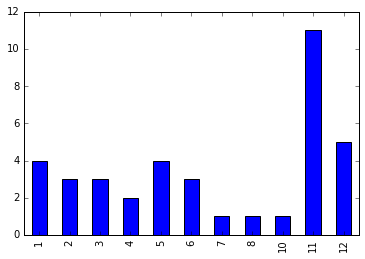

In [46]:
c = cast[cast.name == 'Judi Dench']
c = c.merge(release_dates[release_dates.country == 'USA'])
g = c.groupby(['title', 'year']).date.max()
g.dt.month.value_counts().sort_index().plot(kind = 'bar')

### Totally incorrect what happened below. No, it is not incorrect. Actually, it was correct, I only had to set the number of bins to 12! :-)

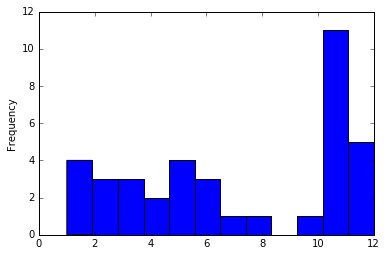

In [44]:
c = cast[cast.name == 'Judi Dench']
c = c.merge(release_dates[release_dates.country == 'USA'])
g = c.groupby(['title', 'year']).date.max()
g.dt.month.plot(kind = 'hist', bins = 12)



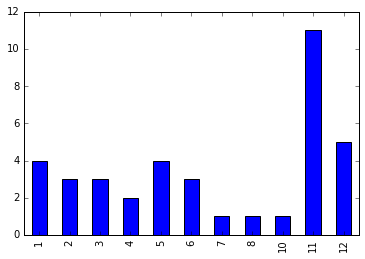

In [25]:
usa = release_dates[release_dates.country == 'USA']


c = cast
c = c[c.name == 'Judi Dench']
m = c.merge(usa).sort_values(by = 'date')
m.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

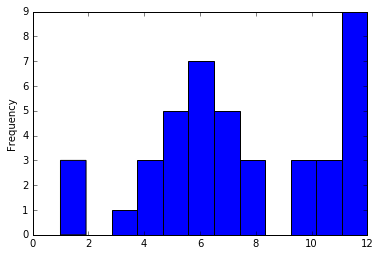

In [45]:
c = cast[cast.name == 'Tom Cruise']
c = c.merge(release_dates[release_dates.country == 'USA'])
g = c.groupby(['title', 'year']).date.max()
g.dt.month.plot(kind = 'hist', bins = 12)